# Data Cleaning

In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv("train.csv")

In [6]:
# Explore the dataset (info, describe, value_counts, EDA)
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
df.head(10)

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM Size GB,Storage Size GB,RAM Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,8.0,3.20,Flagship,12.0,256.0,Flagship,4400.0,66,6.62,1080.0,2400.0,120.0,Punch Hole,48.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,8.0,2.84,Flagship,8.0,128.0,High-End,4500.0,0,6.50,1080.0,2400.0,120.0,Punch Hole,12.0,3.0,32.0,1.0,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Snapdragon,4,8.0,2.40,Unknown,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2408.0,120.0,Water Drop Notch,50.0,2.0,8.0,1.0,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74.0,Yes,Yes,No,No,No,Yes,Helio,99,8.0,2.20,Mid-Range,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2400.0,90.0,Water Drop Notch,50.0,3.0,8.0,1.0,Yes,512 GB,Android,v12,Poco
4,non-expensive,80.0,Yes,Yes,No,No,No,No,Snapdragon,680,8.0,2.40,Mid-Range,8.0,128.0,High-End,5000.0,44,6.58,1080.0,2408.0,90.0,Water Drop Notch,50.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Vivo
5,non-expensive,84.0,Yes,Yes,Yes,No,Yes,Yes,Dimensity,8100,8.0,2.85,Unknown,8.0,128.0,High-End,5080.0,67,6.60,1080.0,2460.0,144.0,Punch Hole,64.0,3.0,16.0,1.0,No,1 TB,Android,v12,POCO
6,non-expensive,84.0,Yes,Yes,Yes,No,No,Yes,Snapdragon,695,8.0,2.20,Mid-Range,8.0,128.0,High-End,5000.0,67,6.67,1080.0,2400.0,120.0,Punch Hole,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v11,Poco
7,non-expensive,78.0,Yes,Yes,Yes,No,No,No,Dimensity,930,8.0,2.20,Unknown,6.0,128.0,Mid-Range,4200.0,66,6.40,1080.0,2400.0,90.0,Punch Hole,50.0,3.0,16.0,1.0,No,1 TB,Android,v12,Realme
8,non-expensive,80.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,695,8.0,2.20,Mid-Range,6.0,128.0,Mid-Range,5000.0,33,6.40,1080.0,2400.0,60.0,Punch Hole,50.0,3.0,16.0,1.0,No,1 TB,Android,v11,Motorola
9,non-expensive,82.0,Yes,Yes,No,No,No,No,Snapdragon,665,8.0,2.40,Unknown,8.0,128.0,High-End,4500.0,18,6.38,1080.0,2340.0,60.0,Water Drop Notch,48.0,1.0,32.0,1.0,Yes,256 GB,Android,v9.0,Vivo


In [7]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    867 non-null    object 
 1   rating                   867 non-null    float64
 2   Dual_Sim                 867 non-null    object 
 3   4G                       867 non-null    object 
 4   5G                       867 non-null    object 
 5   Vo5G                     867 non-null    object 
 6   NFC                      867 non-null    object 
 7   IR_Blaster               867 non-null    object 
 8   Processor_Brand          867 non-null    object 
 9   Processor_Series         867 non-null    object 
 10  Core_Count               867 non-null    float64
 11  Clock_Speed_GHz          867 non-null    float64
 12  Performance_Tier         867 non-null    object 
 13  RAM_Size_GB              867 non-null    float64
 14  Storage_Size_GB          8

In [9]:
df.describe()

,rating,Core_Count,Clock_Speed_GHz,RAM_Size_GB,Storage_Size_GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,78.524798,7.760092,2.449642,6.437578,137.671211,4767.459054,34.536332,6.473968,1064.904268,2186.475202,91.304498,49.862745,2.116494,16.349481,0.943483
std,6.826641,0.890091,0.398170,2.759815,108.508655,1120.556019,35.843186,0.655185,311.984946,562.572215,28.201347,31.905762,1.001866,10.278293,0.296692
min,60.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000
25%,75.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,7.500000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000
50%,80.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000
75%,83.500000,8.000000,2.500000,8.000000,128.000000,5000.000000,52.500000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000
max,89.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,165.000000,200.000000,3.000000,60.000000,2.000000


In [10]:
# Remove duplicate rows
df.duplicated().any()

np.True_

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Handle missing values (NULLs) and 'Unknown' values
df.isna().sum()

price                      0
rating                     0
Dual_Sim                   0
4G                         0
5G                         0
Vo5G                       0
NFC                        0
IR_Blaster                 0
Processor_Brand            0
Processor_Series           0
Core_Count                 0
Clock_Speed_GHz            0
Performance_Tier           0
RAM_Size_GB                0
Storage_Size_GB            0
RAM_Tier                   0
battery_capacity           0
fast_charging_power        0
Screen_Size                0
Resolution_Width           0
Resolution_Height          0
Refresh_Rate               0
Notch_Type                 0
primary_rear_camera_mp     0
num_rear_cameras           0
primary_front_camera_mp    0
num_front_cameras          0
memory_card_support        0
memory_card_size           0
os_name                    0
os_version                 0
brand                      0
dtype: int64

In [13]:
df.value_counts()

price          rating  Dual_Sim  4G   5G   Vo5G  NFC  IR_Blaster  Processor_Brand  Processor_Series  Core_Count  Clock_Speed_GHz  Performance_Tier  RAM_Size_GB  Storage_Size_GB  RAM_Tier   battery_capacity  fast_charging_power  Screen_Size  Resolution_Width  Resolution_Height  Refresh_Rate  Notch_Type   primary_rear_camera_mp  num_rear_cameras  primary_front_camera_mp  num_front_cameras  memory_card_support  memory_card_size  os_name  os_version  brand 
non-expensive  89.0    Yes       Yes  Yes  No    Yes  Yes         Dimensity        1080              8.0         2.60             Unknown           8.0          256.0            High-End   4300.0            120                  6.67         1080.0            2400.0             120.0         Punch Hole   200.0                   3.0               16.0                     1.0                Yes                  512 GB            Android  v12         Xiaomi    1
expensive      60.0    Yes       Yes  No   No    Yes  No          Other        

In [14]:
# Treat 'Unknown' as a valid category when it is the majority in 'Performance_Tier'
df["Performance_Tier"].value_counts()

Performance_Tier
Unknown      616
Flagship     110
Mid-Range     75
High-End      42
Budget        18
Name: count, dtype: int64

In [15]:
df["RAM_Tier"].value_counts()

RAM_Tier
Mid-Range    380
High-End     292
Budget        92
Flagship      77
Unknown       20
Name: count, dtype: int64

In [16]:
# Fill 'Unknown' in 'RAM Tier' column with the mode
modeRam = df["RAM_Tier"].mode()[0]
df["RAM_Tier"] = df["RAM_Tier"].str.replace("Unknown", modeRam)

In [17]:
df["Notch_Type"].value_counts()

Notch_Type
Punch Hole          446
Water Drop Notch    269
No Notch             88
Unknown              23
Small Notch          21
Large Notch           9
Dual Punch Hole       5
Name: count, dtype: int64

In [18]:
# Fill 'Unknown' in 'Notch_Type' column with the mode
modeRam = df["Notch_Type"].mode()[0]
df["Notch_Type"] = df["Notch_Type"].str.replace("Unknown", modeRam)

In [19]:
df["Processor_Series"].value_counts()

Processor_Series
35         44
695        41
680        37
8          37
700        35
888        27
810        27
778        26
8 Gen1     26
8 Gen2     23
Unknown    21
870        20
96         18
22         17
99         15
720        15
85         14
15         14
80         13
8100       13
865        12
920        12
1          12
25         11
16         11
9000       11
612        11
95         10
1300       10
900         9
990         9
1080        9
765         9
9863        9
88          9
2           8
480         8
850         8
7 Gen1      8
1280        7
37          7
4           7
732         7
606         6
610         6
8200        6
2100        5
14          5
800         5
616         5
1200        4
9200        4
750         4
1330        4
3           4
665         4
662         4
13          4
730         3
215         3
930         3
690         3
439         3
7731        3
845         3
70          3
9611        3
675         3
855         3
6           3
310

In [20]:
# Convert 'Processor_Series' column to numerical and replace 'Unknown' with the mode
df["Processor_Series"] = df["Processor_Series"].str.replace(" Gen1",".1").str.replace(" Gen2",".2").str.replace("Unknown","35").astype(float)

In [21]:
df["memory_card_size"].value_counts()

memory_card_size
1 TB      648
512 GB    101
256 GB     87
32 GB       7
128 GB      7
2 TB        6
64 GB       3
48 GB       1
16 GB       1
Name: count, dtype: int64

In [22]:
# Clean 'memory_card_size' column: 1-Remove 'GB' and 'TB' text  2-Convert TB to GB  3-Convert the column to numerical type
df["memory_card_size_GB"] = df["memory_card_size"].astype(str).str.replace("GB","").str.replace("TB","*1000").map(lambda X:eval(X)) # eval execute Python code
df["memory_card_size_GB"] = df["memory_card_size_GB"].astype(int)
df.drop(columns="memory_card_size",inplace=True)

In [23]:
df["os_version"].value_counts()

os_version
v12       475
v11       201
v10        51
v13        41
v9.0       25
v10.0      19
v16        12
v8.1        9
v15         8
v8.0        3
v11.0       3
v6.0        2
v15.0       2
v5.1.1      2
v4.4.2      1
v12.1       1
v3.0        1
v2          1
v12.3       1
v2.0        1
v17         1
v4.0        1
Name: count, dtype: int64

In [24]:
# Convert 'os_version' column to numerical:

# Remove 'v' and dots
df["os_version"] = df["os_version"].str.replace("v", "").str.replace(".", "", 1).astype(float)

# Apply condition: if > 17, divide by 10 to correct the formatting
df["os_version"] = df["os_version"].apply(lambda x: x / 10 if x > 17 else x)

df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Core_Count,Clock_Speed_GHz,Performance_Tier,RAM_Size_GB,Storage_Size_GB,RAM_Tier,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_GB
0,expensive,85.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,870.0,8.0,3.20,Flagship,12.0,256.0,Flagship,4400.0,66,6.62,1080.0,2400.0,120.0,Punch Hole,48.0,3.0,16.0,1.0,Yes,Android,12.0,iQOO,1000
1,non-expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,865.0,8.0,2.84,Flagship,8.0,128.0,High-End,4500.0,0,6.50,1080.0,2400.0,120.0,Punch Hole,12.0,3.0,32.0,1.0,Yes,Android,10.0,Samsung,1000
2,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Snapdragon,4.0,8.0,2.40,Unknown,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2408.0,120.0,Water Drop Notch,50.0,2.0,8.0,1.0,Yes,Android,12.0,iQOO,1000
3,non-expensive,74.0,Yes,Yes,No,No,No,Yes,Helio,99.0,8.0,2.20,Mid-Range,4.0,64.0,Mid-Range,5000.0,18,6.58,1080.0,2400.0,90.0,Water Drop Notch,50.0,3.0,8.0,1.0,Yes,Android,12.0,Poco,512
4,non-expensive,80.0,Yes,Yes,No,No,No,No,Snapdragon,680.0,8.0,2.40,Mid-Range,8.0,128.0,High-End,5000.0,44,6.58,1080.0,2408.0,90.0,Water Drop Notch,50.0,3.0,16.0,1.0,Yes,Android,12.0,Vivo,1000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 0 to 866
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    861 non-null    object 
 1   rating                   861 non-null    float64
 2   Dual_Sim                 861 non-null    object 
 3   4G                       861 non-null    object 
 4   5G                       861 non-null    object 
 5   Vo5G                     861 non-null    object 
 6   NFC                      861 non-null    object 
 7   IR_Blaster               861 non-null    object 
 8   Processor_Brand          861 non-null    object 
 9   Processor_Series         861 non-null    float64
 10  Core_Count               861 non-null    float64
 11  Clock_Speed_GHz          861 non-null    float64
 12  Performance_Tier         861 non-null    object 
 13  RAM_Size_GB              861 non-null    float64
 14  Storage_Size_GB          861 no

In [26]:
df.describe()

,rating,Processor_Series,Core_Count,Clock_Speed_GHz,RAM_Size_GB,Storage_Size_GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,os_version,memory_card_size_GB
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,78.522648,1101.110569,7.760743,2.448885,6.435981,137.664274,4767.000000,34.570267,6.473264,1064.799071,2184.963995,91.278746,49.861789,2.121951,16.327526,0.946574,11.521417,854.076655
std,6.833298,2282.664120,0.890984,0.398605,2.759826,108.780726,1124.272221,35.838673,0.657379,313.068817,564.238425,28.282444,32.016866,0.996619,10.279107,0.292428,1.370022,297.784593
min,60.000000,1.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000,2.000000,16.000000
25%,75.000000,35.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,10.000000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000,11.000000,1000.000000
50%,80.000000,680.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000,12.000000,1000.000000
75%,83.000000,845.000000,8.000000,2.500000,8.000000,128.000000,5000.000000,50.000000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000,12.000000,1000.000000
max,89.000000,9863.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,165.000000,200.000000,3.000000,60.000000,2.000000,17.000000,2000.000000


# Visualization 

In [35]:
# Visualization code
numerical_features = ['rating', 'Core_Count', 'Clock_Speed_GHz', 'RAM_Size_GB', 'Storage_Size_GB', 'battery_capacity', 'fast_charging_power', 'Screen_Size', 'Resolution_Width', 'Resolution_Height', 'Refresh_Rate', 'primary_rear_camera_mp', 'num_rear_cameras', 'primary_front_camera_mp', 'num_front_cameras']

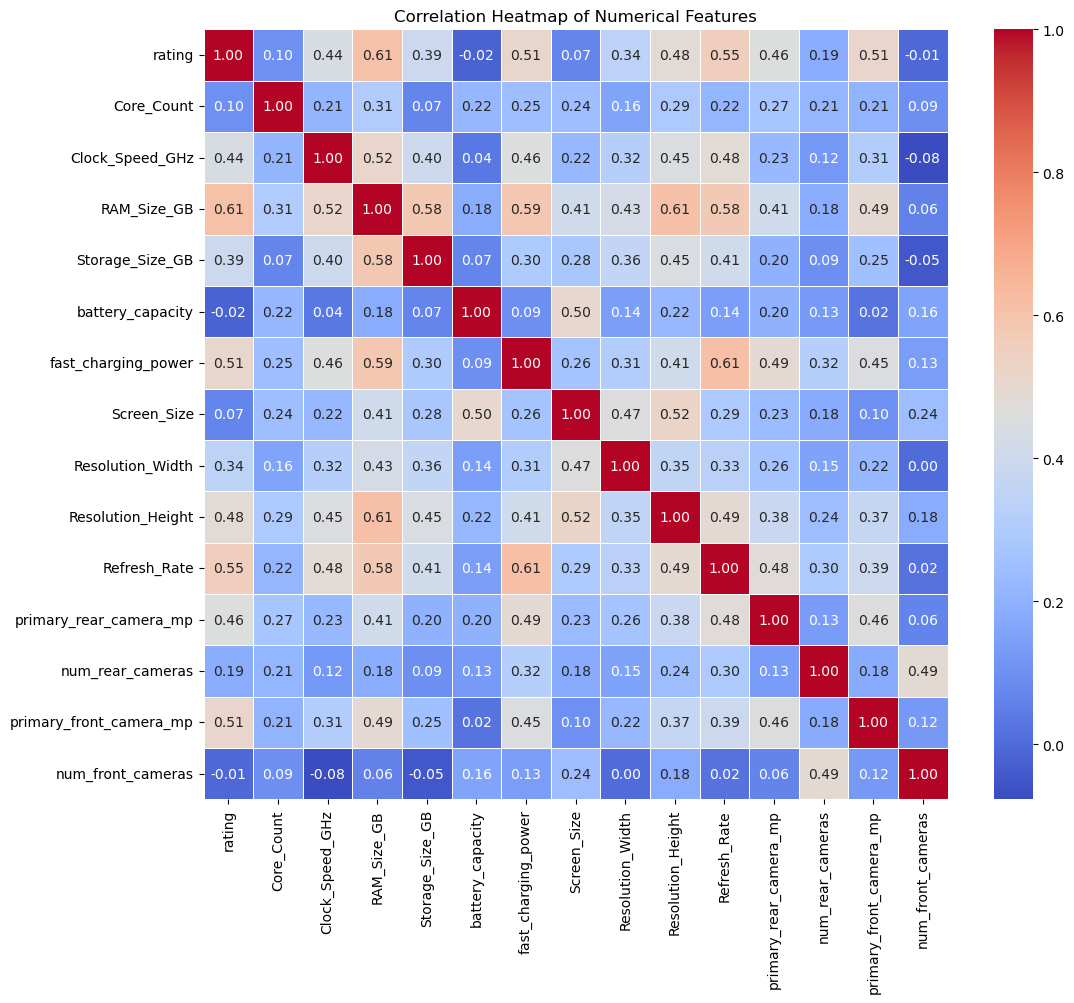

In [40]:
plt.figure(figsize=(12, 10))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# high positive correlations (RAM Size GB with Storage Size GB,RAM Size GB with rating)

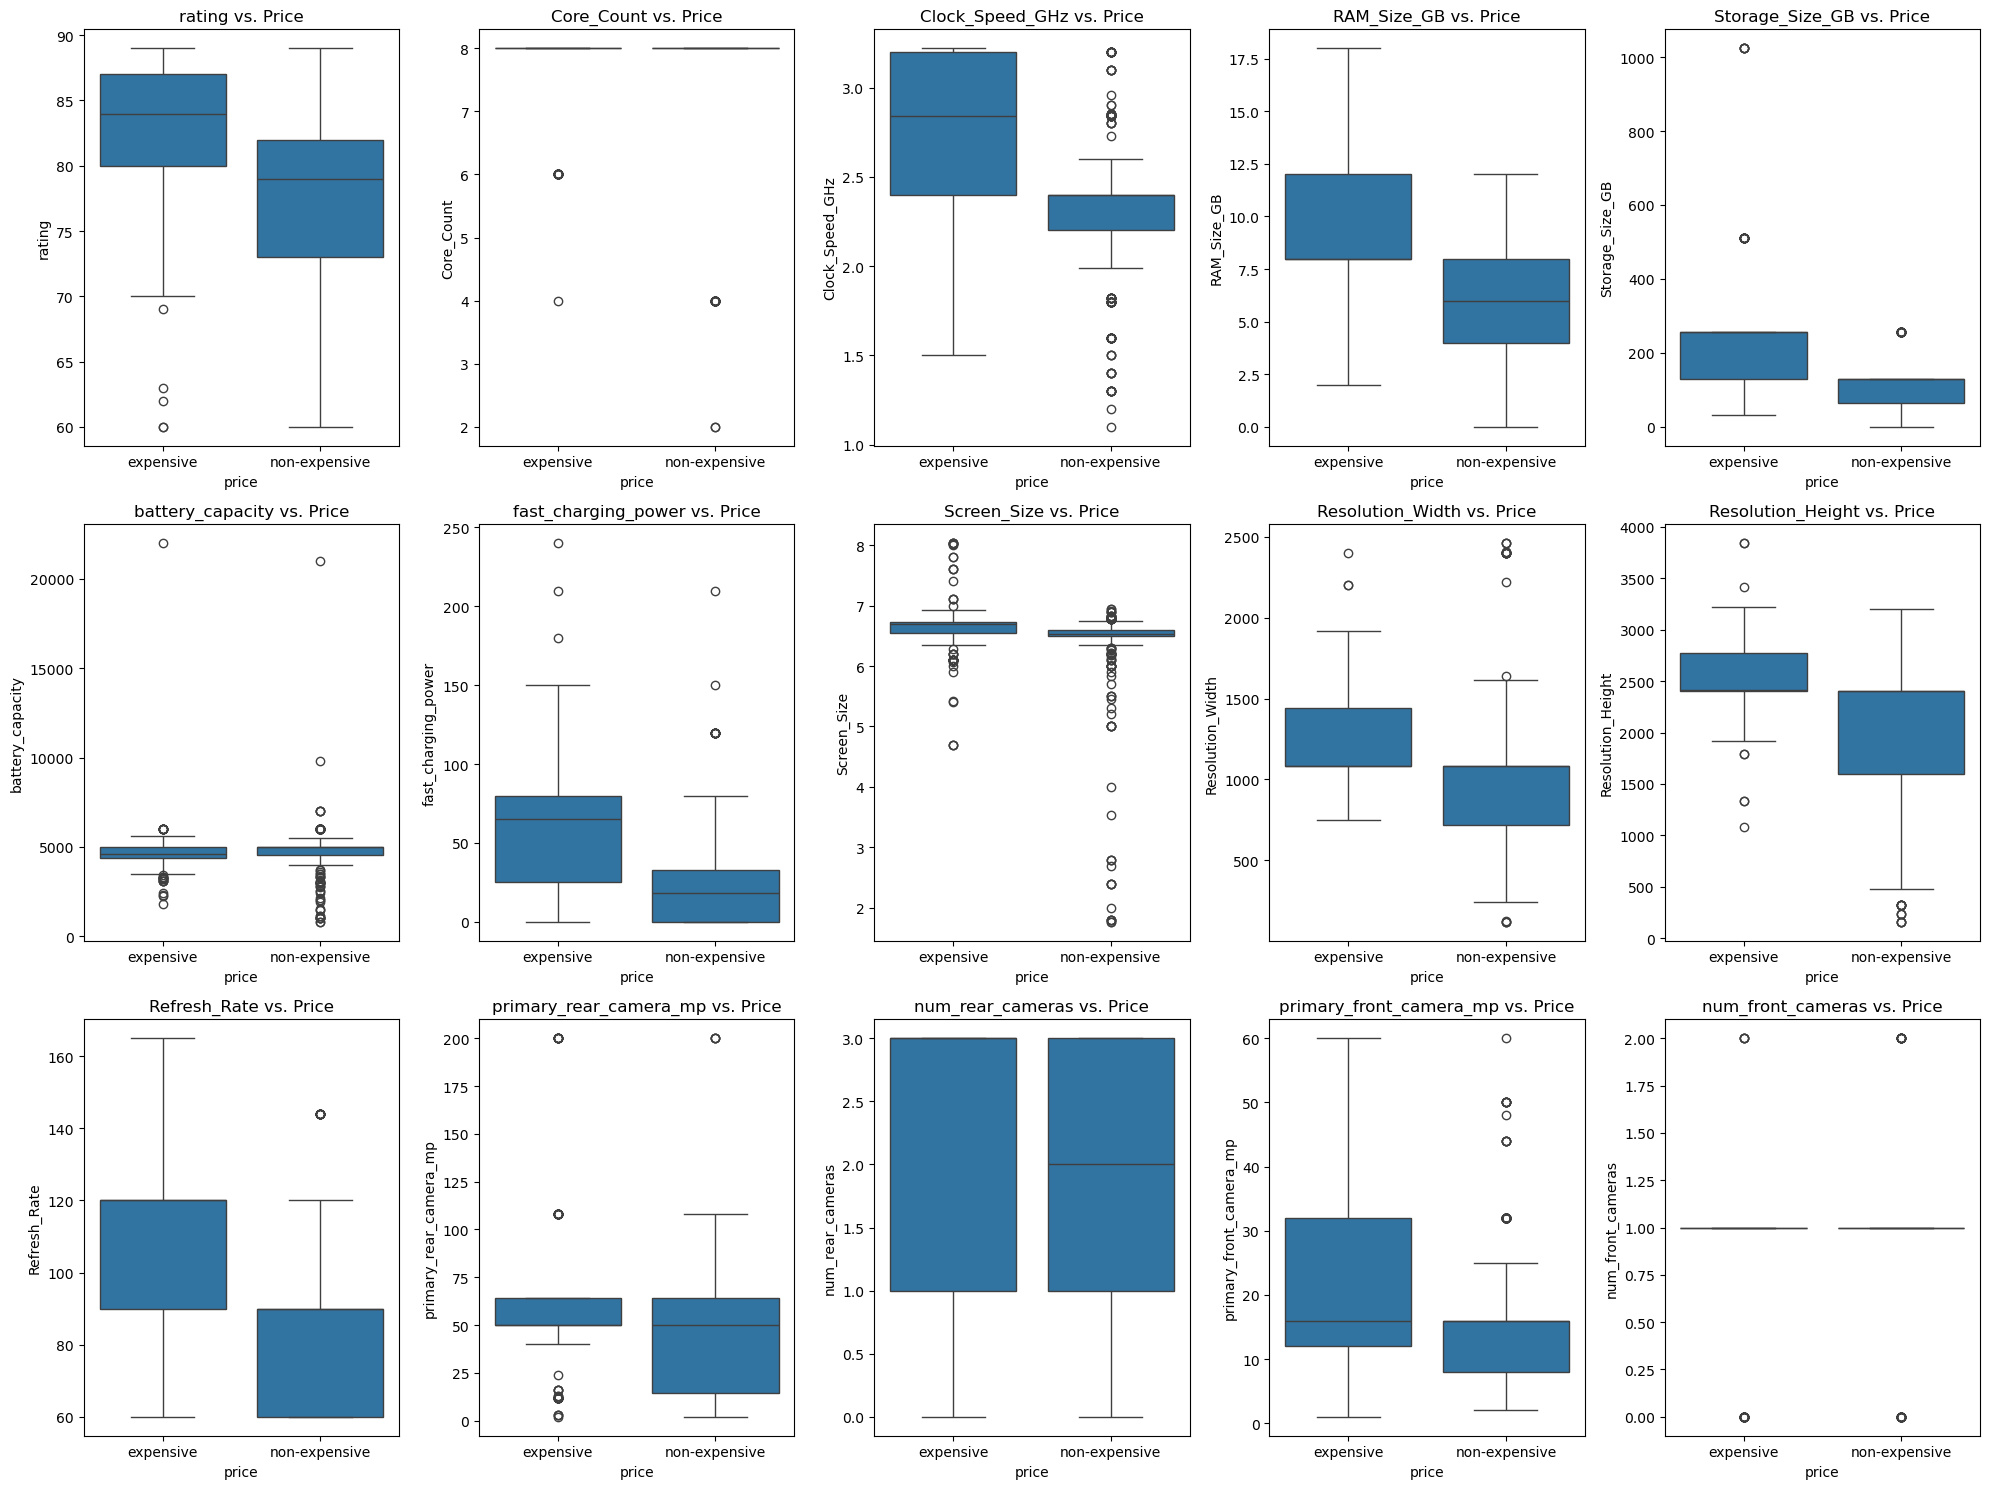

In [42]:
 #Box Plots (Numerical Features vs. Price Category)
fig, axes = plt.subplots(3, 5, figsize=(20, 15))
numerical_features_subset = numerical_features[:15]  # Limit for readability
for i, feature in enumerate(numerical_features_subset):
    ax = axes[i//5, i%5]
    sns.boxplot(data=df, x='price', y=feature, ax=ax)
    ax.set_title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

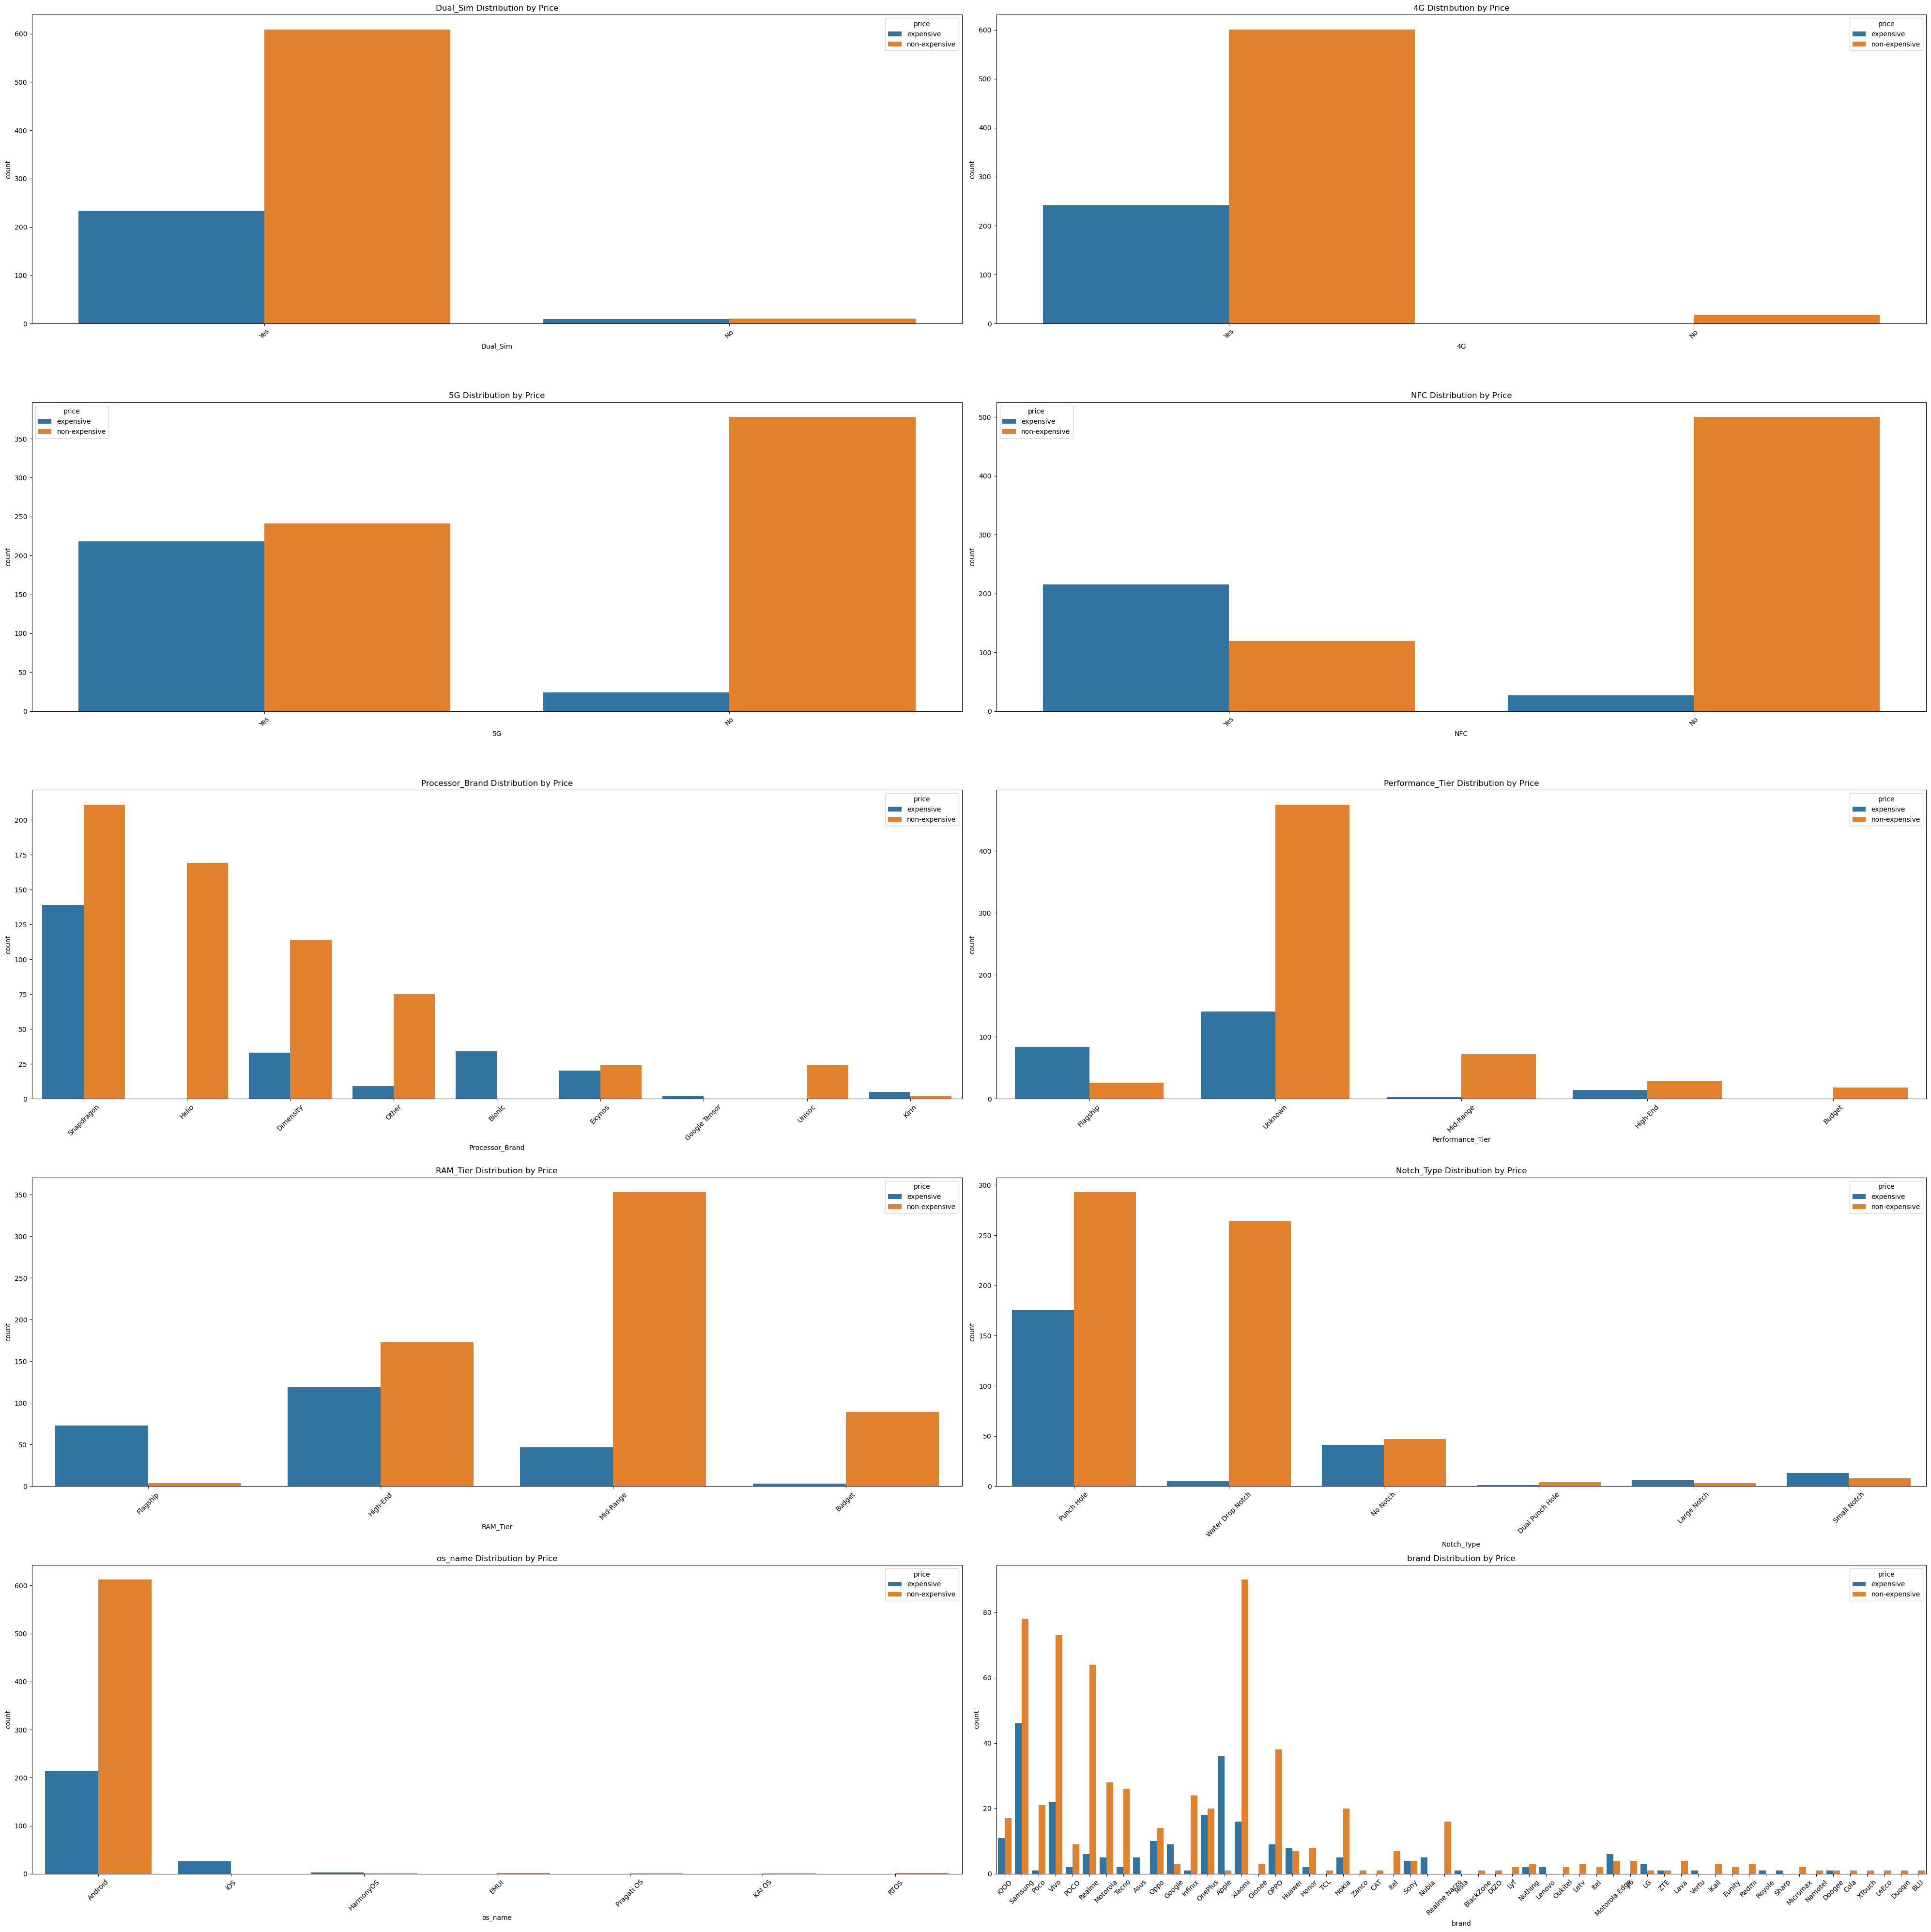

In [46]:
 #Count Plots (Categorical Features vs. Price Category)
categorical_features = ['Dual_Sim', '4G', '5G', 'NFC', 'Processor_Brand', 'Performance_Tier', 'RAM_Tier', 'Notch_Type', 'os_name', 'brand']
fig, axes = plt.subplots(5, 2, figsize=(40, 40))
for i, feature in enumerate(categorical_features):
    ax = axes[i//2, i%2]
    sns.countplot(data=df, x=feature, hue='price', ax=ax)
    ax.set_title(f'{feature} Distribution by Price')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

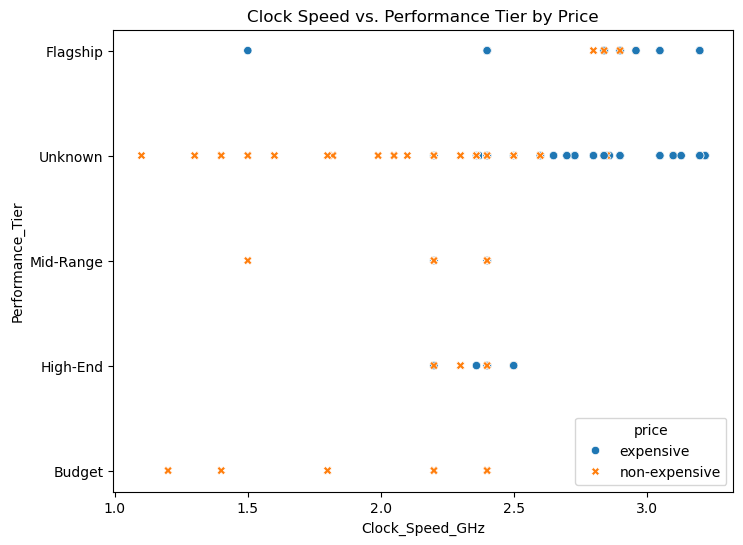

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Clock_Speed_GHz', y='Performance_Tier', hue='price', style='price')
plt.title('Clock Speed vs. Performance Tier by Price')
plt.show()

""" Expensive price is concentrated at higher clock speeds (around 2.5–3.1 GHz) and
     mostly in the High‑End and Flagship categories """

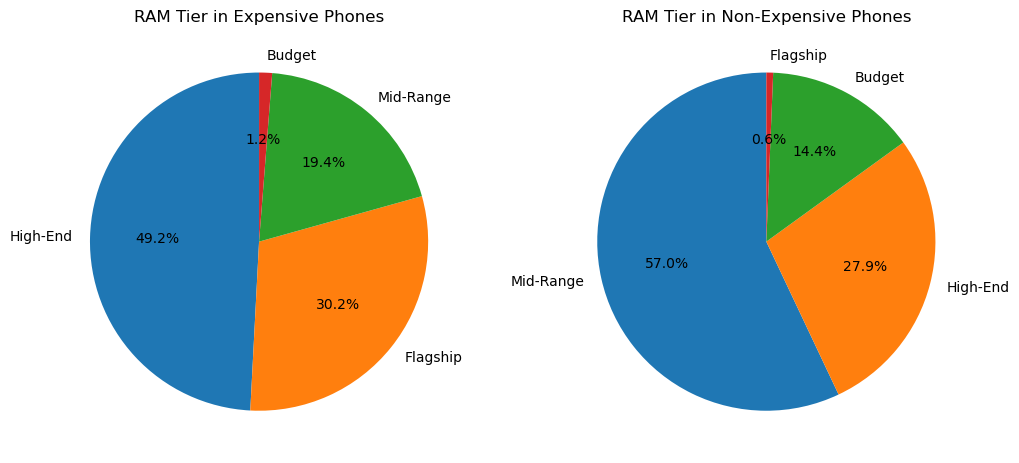

In [51]:
ram_tier_expensive = df[df['price'] == 'expensive']['RAM_Tier'].value_counts()
ram_tier_non_expensive = df[df['price'] == 'non-expensive']['RAM_Tier'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(ram_tier_expensive, labels=ram_tier_expensive.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('RAM Tier in Expensive Phones')
axes[1].pie(ram_tier_non_expensive, labels=ram_tier_non_expensive.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('RAM Tier in Non-Expensive Phones')
plt.show()
# Expensive phones are dominated by High‑End and Flagship RAM tiers
# Non‑expensive phones cluster around Mid‑Range RAM

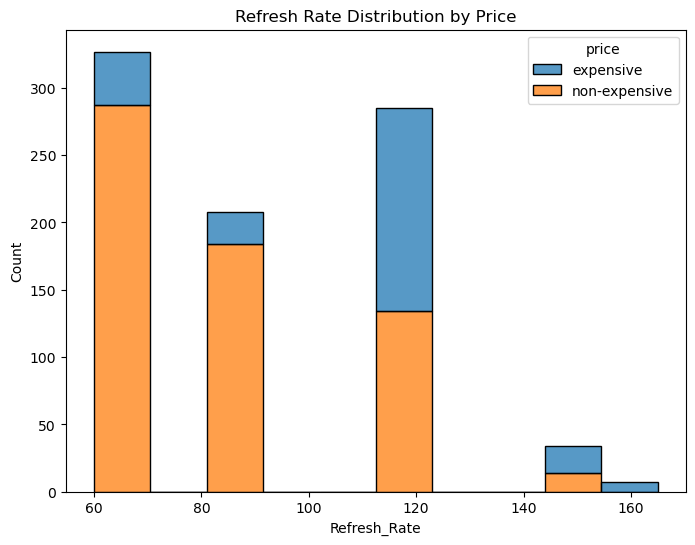

In [52]:
# Histogram: Refresh_Rate Distribution by Price
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Refresh_Rate', hue='price', multiple='stack', bins=10)
plt.title('Refresh Rate Distribution by Price')
plt.show()
# Most non-expensive phones use a standard 60Hz refresh rate
# Expensive devices are dominant at higher refresh rates, especially 120Hz, and some even reach 145Hz or 160Hz

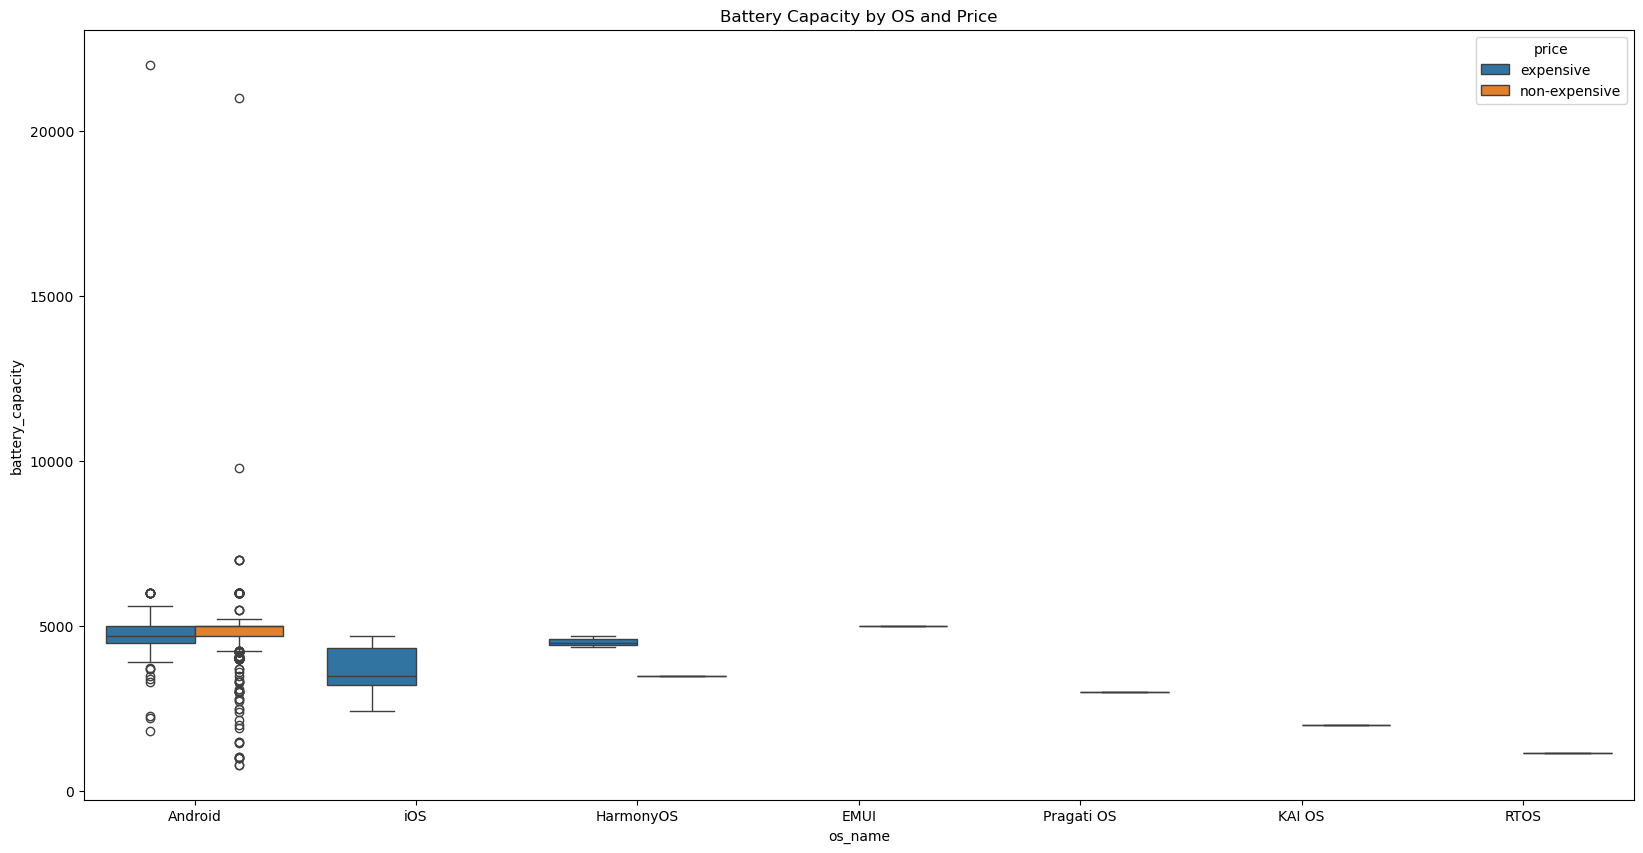

In [60]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='os_name', y='battery_capacity', hue='price')
plt.title('Battery Capacity by OS and Price')
plt.show()

# Feature Enginerring & Selection

In [28]:
# Feature Enginerring code

# Modeling

### Models -> 2 

In [29]:
# Models code

### Models -> 2 

In [30]:
# Models code

### Models -> 1

In [31]:
# Model code